[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/USERNAME/REPOSITORY/blob/BRANCH/NOTEBOOK.ipynb)

# **📊 COVID-19 va boshqa pandemiyalar statistikasi**

**1-qadam. Kutubxonalarni chaqirish**

Bizga kerakli kutubxonalar:  
- `pandas` – jadval bilan ishlash uchun  
- `matplotlib` – grafiklar chizish uchun  
- `requests` – ochiq API va CSV fayllardan ma’lumot olish uchun


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

**2-qadam. COVID-19 ma’lumotlarini olish**

Johns Hopkins University (JHU) GitHub’dan global COVID-19 statistikasi (kunlik holatlar va o‘limlar)ni yuklab olamiz.


In [2]:
# COVID-19 ma'lumotlari (Confirmed va Deaths)
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# CSV fayllarni yuklash
df_confirmed = pd.read_csv(url_confirmed)
df_deaths = pd.read_csv(url_deaths)

# Faqat sanalar bo‘yicha yig‘ish (butun dunyo bo‘yicha)
confirmed = df_confirmed.iloc[:, 4:].sum(axis=0)
deaths = df_deaths.iloc[:, 4:].sum(axis=0)

# DataFrame yaratish
df_covid = pd.DataFrame({
    "Sana": pd.to_datetime(confirmed.index),
    "Kasallanganlar": confirmed.values,
    "O‘limlar": deaths.values
})

/tmp/ipython-input-2072064094.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Sana": pd.to_datetime(confirmed.index),


**3-qadam. 2020–2024 yillar oralig‘ini tanlash**

Biz faqat COVID-19 pandemiyasi davridagi ma’lumotlarni ko‘rib chiqamiz.


In [3]:
df_covid = df_covid[(df_covid["Sana"].dt.year >= 2020) & (df_covid["Sana"].dt.year <= 2024)]

**4-qadam. Grafik chizish**

Kasallanganlar (mln hisobida) va o‘limlar (ming hisobida)ni bitta grafikda ko‘rsatamiz.


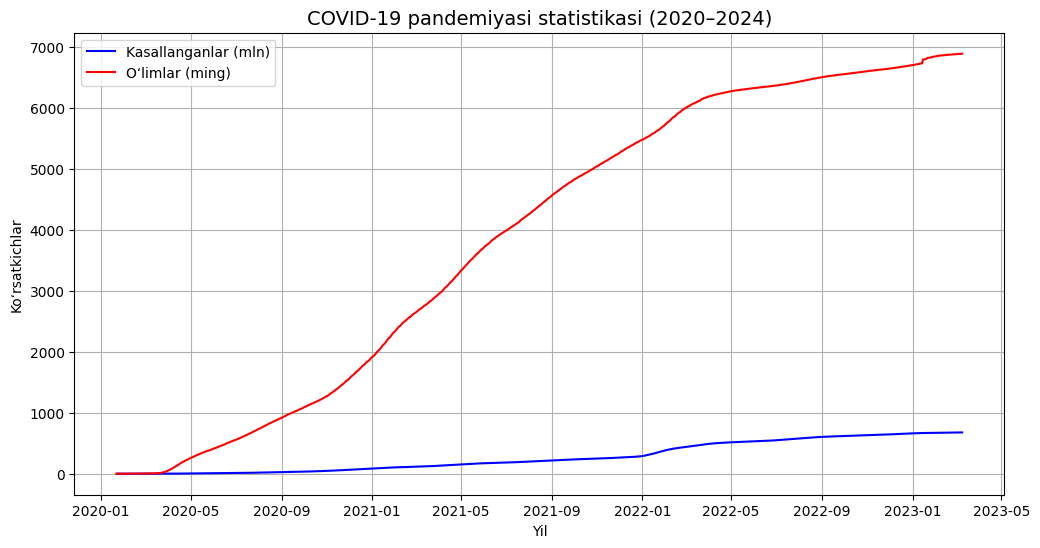

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df_covid["Sana"], df_covid["Kasallanganlar"]/1e6, label="Kasallanganlar (mln)", color="blue")
plt.plot(df_covid["Sana"], df_covid["O‘limlar"]/1e3, label="O‘limlar (ming)", color="red")

plt.title("COVID-19 pandemiyasi statistikasi (2020–2024)", fontsize=14)
plt.xlabel("Yil")
plt.ylabel("Ko‘rsatkichlar")
plt.legend()
plt.grid(True)
plt.show()